In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

In [2]:
dfx_price = pd.read_csv("input/X.price.csv")
dfx_ret = pd.read_csv("input/X.return.csv")
dfy_price = pd.read_csv("input/Y.price.csv")
dfy_ret = pd.read_csv("input/Y.return.csv")

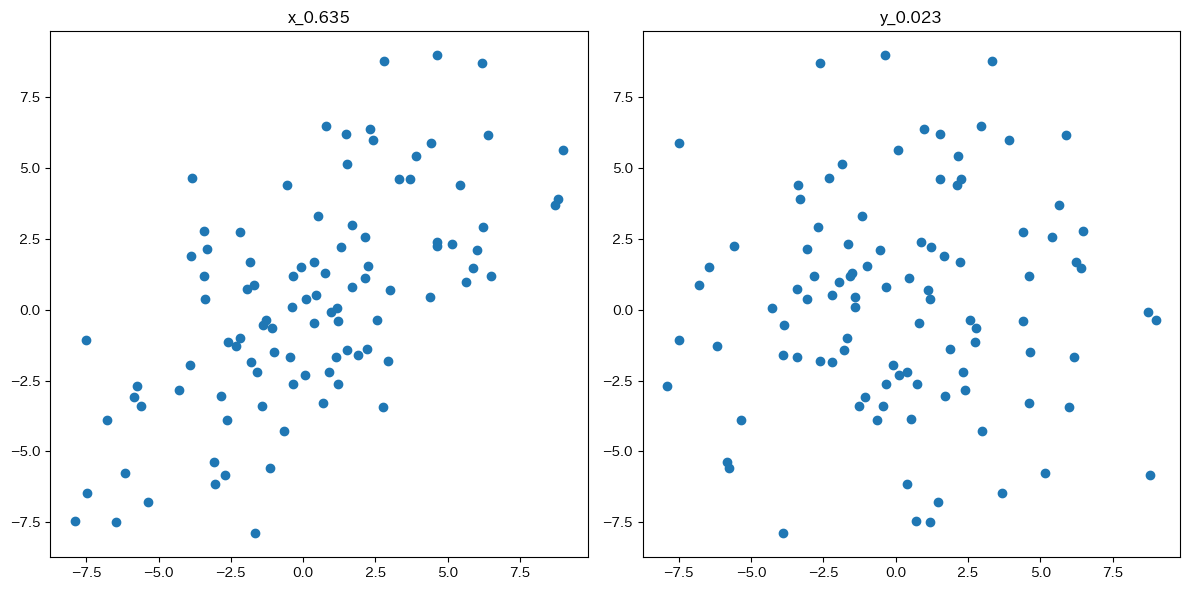

In [3]:
# 1点ずらしの相関をみる (ラグ1の自己相関)
fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax1 = axs[0]
ax1.scatter(dfx_ret.iloc[:-1], dfx_ret.iloc[1:])
cor = np.corrcoef(dfx_ret["x"].iloc[:-1], dfx_ret["x"].iloc[1:])[0, 1]
ax1.set_title(f"x_{cor:0.3f}")

ax2 = axs[1]
ax2.scatter(dfy_ret.iloc[:-1], dfy_ret.iloc[1:])
cor = np.corrcoef(dfy_ret["x"].iloc[:-1], dfy_ret["x"].iloc[1:])[0, 1]
ax2.set_title(f"y_{cor:0.3f}")
plt.tight_layout()
plt.show()

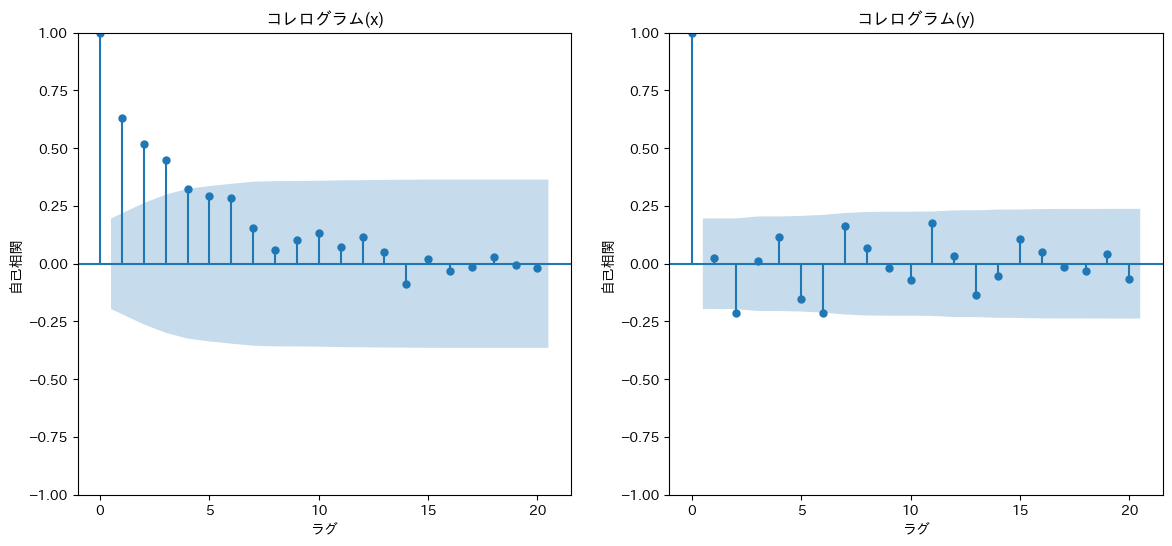

In [4]:
# コレログラム
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

ax1 = axs[0]
plot_acf(dfx_ret, lags=20, alpha=0.05, ax=ax1)
ax1.set_title(f"コレログラム(x)")
ax1.set_xlabel("ラグ")
ax1.set_ylabel("自己相関")

ax2 = axs[1]
plot_acf(dfy_ret, lags=20, alpha=0.05, ax=ax2)
ax2.set_title(f"コレログラム(y)")
ax2.set_xlabel("ラグ")
ax2.set_ylabel("自己相関")

plt.show()

In [5]:
# 自己相関係数
from statsmodels.tsa.stattools import acf
acf_result_x = acf(dfx_ret, nlags=20, fft=True)
acf_result_y = acf(dfy_ret, nlags=20, fft=True)

In [6]:
acf_result_x  # 推移律あり

array([ 1.        ,  0.63097735,  0.51663365,  0.44953328,  0.32406794,
        0.2945293 ,  0.28604115,  0.15597257,  0.05928554,  0.10331542,
        0.13398259,  0.07357625,  0.11553765,  0.05152195, -0.08725323,
        0.02001354, -0.03168261, -0.01431162,  0.02696771, -0.00539694,
       -0.01992862])

In [7]:
acf_result_y

array([ 1.        ,  0.02343057, -0.21150287,  0.01051351,  0.11402679,
       -0.15350173, -0.215458  ,  0.16231334,  0.0689582 , -0.01888028,
       -0.06945419,  0.17458028,  0.03252729, -0.13630932, -0.05255766,
        0.10837531,  0.05214136, -0.01493333, -0.02995716,  0.04399946,
       -0.06802666])

In [8]:
# 偏自己相関係数
from statsmodels.tsa.stattools import pacf
pacf_result_x = pacf(dfx_ret, nlags=20)
pacf_result_y = pacf(dfy_ret, nlags=20)

In [9]:
pacf_result_x

array([ 1.        ,  0.63735086,  0.2037123 ,  0.11605178, -0.06586605,
        0.06542388,  0.08595059, -0.15756835, -0.14504708,  0.14981222,
        0.17179333, -0.11947313,  0.04055989, -0.04930581, -0.24139893,
        0.17395822, -0.09466728,  0.131602  ,  0.06472684, -0.05183839,
        0.01385249])

In [10]:
pacf_result_y

array([ 1.        ,  0.02366725, -0.21650066,  0.02327997,  0.07456388,
       -0.16952077, -0.19259476,  0.13455922, -0.02390458,  0.06306209,
       -0.06566897,  0.14253909, -0.00114357, -0.04282987, -0.0514945 ,
        0.08245503,  0.04577087,  0.12313895, -0.10223858,  0.02547721,
       -0.12431092])

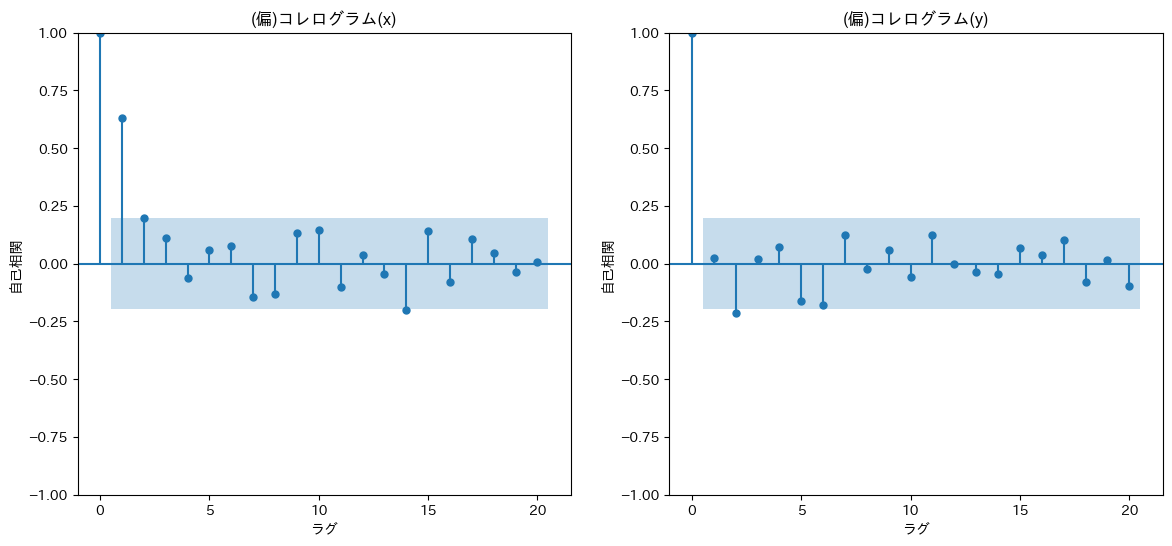

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

ax1 = axs[0]
plot_pacf(dfx_ret, lags=20, alpha=0.05, ax=ax1)
ax1.set_title(f"(偏)コレログラム(x)")
ax1.set_xlabel("ラグ")
ax1.set_ylabel("自己相関")

ax2 = axs[1]
plot_pacf(dfy_ret, lags=20, alpha=0.05, ax=ax2)
ax2.set_title(f"(偏)コレログラム(y)")
ax2.set_xlabel("ラグ")
ax2.set_ylabel("自己相関")

plt.show()

In [12]:
# Ljung-Box検定 (帰無仮説≒自己相関関係を有していない)
import statsmodels.api as sm

result = sm.stats.acorr_ljungbox(dfx_ret, lags=[10])
result.head()

,lb_stat,lb_pvalue
10,125.689217,3.530785e-22


In [13]:
result = sm.stats.acorr_ljungbox(dfy_ret, lags=[10])
result.head()

,lb_stat,lb_pvalue
10,17.67618,0.060678


In [14]:
# AR(1)モデル
import statsmodels.api as sm

model = sm.tsa.ARIMA(dfx_ret, order=(1, 0, 0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -248.888
Date:                Tue, 06 Feb 2024   AIC                            503.775
Time:                        01:28:23   BIC                            511.591
Sample:                             0   HQIC                           506.938
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1310      0.815      0.161      0.872      -1.466       1.728
ar.L1          0.6336      0.086      7.388      0.000       0.465       0.802
sigma2         8.4548      1.395      6.063      0.000       5.722      11.188
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.23   Prob(JB):                         0.26
Heteroskedasticity (H):               0.48   Skew:                             0.36
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model = sm.tsa.ARIMA(dfy_ret, order=(1,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -274.460
Date:                Tue, 06 Feb 2024   AIC                            554.919
Time:                        01:30:28   BIC                            562.735
Sample:                             0   HQIC                           558.083
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2287      0.387      0.591      0.555      -0.530       0.987
ar.L1          0.0234      0.106      0.220      0.826      -0.184       0.231
sigma2        14.1726      2.190      6.471      0.000       9.880      18.465
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.96   Prob(JB):                         0.78
Heteroskedasticity (H):               1.20   Skew:                             0.06
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df_price = pd.read_csv("input/price4.csv")

In [23]:
# Dickey-Fuller検定: 帰無仮説はデータ系列に単位根が存在する
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_price["x7272"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical values:")
for k, v in result[4].items():
    print(f"    {k}: {v}")

ADF Statistic: -0.6050944570008022
p-value: 0.869826728098464
Critical values:
    1%: -3.486055829282407
    5%: -2.8859430324074076
    10%: -2.5797850694444446


In [20]:
df_return = pd.read_csv("input/return4.csv")

In [21]:
# Dickey-Fuller検定: 帰無仮説はデータ系列に単位根が存在する
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_return["x7272"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical values:")
for k, v in result[4].items():
    print(f"    {k}: {v}")

ADF Statistic: -11.33401288268396
p-value: 1.0949785696011112e-20
Critical values:
    1%: -3.4865346059036564
    5%: -2.8861509858476264
    10%: -2.579896092790057
